# 1-DBSCAN聚类算法

In [9]:
#修改凝聚层次聚类案例，基于DBSCAN聚类算法进行聚类划分，选择最优半径。
import numpy as np
import sklearn.cluster as sc
import sklearn.metrics as sm
import matplotlib.pyplot as mp

x = np.loadtxt('./data/ml_data/perf.txt', delimiter=',')#delimiter:用于分隔数据
print(x.shape)
#优选DBSCAN模型的半径
epsilons, scores, models = np.linspace(0.3, 1.2, 10), [], []
for epsilon in epsilons:
    # DBSCAN聚类器
    model = sc.DBSCAN(eps=epsilon, min_samples=5)     #min_samples：最小样本数
    model.fit(x)
    pred_y=model.labels_    #预测结果
    score = sm.silhouette_score(x, pred_y, sample_size=len(x), metric='euclidean')  #metric:设置距离为欧氏距离
    print(epsilon,'-->',score)
    #存储，以便于后续使用
    scores.append(score)
    models.append(model)
#输出最优模型与最优得分
scores = np.array(scores)
best_index = scores.argmax()
best_epsilon = epsilons[best_index]  #最优半径
print("best_epsilon:",best_epsilon)
best_score = scores[best_index]      #最优得分
print("best_score:",best_score)
#得到最优模型
best_model = models[best_index]

(250, 2)
0.3 --> 0.12865164017329436
0.39999999999999997 --> 0.3593618148137506
0.5 --> 0.5134143263329636
0.6 --> 0.6165321688342581
0.7 --> 0.6321600450689241
0.7999999999999999 --> 0.6366395861050828
0.8999999999999999 --> 0.514167895613453
1.0 --> 0.5629298661962946
1.0999999999999999 --> 0.5629298661962946
1.2 --> 0.5629298661962946
best_epsilon: 0.7999999999999999
best_score: 0.6366395861050828


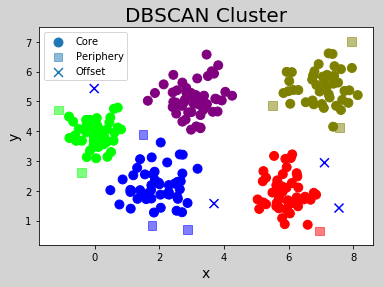

In [3]:
#使用最优模型，绘制聚类效果图.
best_model = models[best_index]
pred_y = best_model.fit_predict(x)     #拿到样本输出
#获取核心样本、外周样本、孤立样本。
core_mask = np.zeros(len(x), dtype=bool)
#核心样本               #核心样本索引
core_mask[best_model.core_sample_indices_] = True
#获取孤立样本
offset_mask = best_model.labels_ == -1
#外周样本         #非(按位取反)
periphery_mask = ~(core_mask | offset_mask)
#绘制聚类效果图
mp.figure('DBSCAN Cluster', facecolor='lightgray')
mp.title('DBSCAN Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
labels = best_model.labels_
#核心样本绘图
mp.scatter(x[core_mask][:, 0], x[core_mask][:, 1], c=labels[core_mask],maker='o',    #maker:形状
           cmap='brg', s=80, label='Core')
#外周样本绘图
mp.scatter(x[periphery_mask][:, 0], x[periphery_mask][:, 1], alpha=0.5,
           c=labels[periphery_mask], cmap='brg', marker='s', s=80, label='Periphery')
#孤立样本绘图
mp.scatter(x[offset_mask][:, 0], x[offset_mask][:, 1],
           c=labels[offset_mask], cmap='brg', marker='x', s=80, label='Offset')
mp.legend()
mp.show()

# 解析ratings.json，根据每个用户对已观看电影的打分计算样本间的欧氏距离，输出欧氏距离得分矩阵。

In [14]:
import json
import numpy as np

with open('./data/ml_data/ratings.json', 'r') as f:
    ratings = json.loads(f.read())
#获取用户列表/xcmat：相似度矩阵
users, scmat = list(ratings.keys()), []
#构建user-user的相似度矩阵
for user1 in users:
    scrow = []   #一行
    for user2 in users:
        #找到user1和user2共同看过的电影
        movies = set()
        for movie in ratings[user1]:
            if movie in ratings[user2]:
                movies.add(movie)
        #通过两个用户相同电影评分的距离计算相似度
        if len(movies) == 0:
            score = 0
        else:
            x, y = [], []
            #整理两用户对相同电影的评分
            for movie in movies:
                x.append(ratings[user1][movie])
                y.append(ratings[user2][movie])
            #计算相似度
            x = np.array(x)
            y = np.array(y)
            #score = 1 / (1 + np.sqrt(((x - y) ** 2).sum()))
            score=np.corrcoef(x,y)[0,1]
        scrow.append(score)
    scmat.append(scrow)
print("scmat:",scmat)
users = np.array(users)
scmat = np.array(scmat)
for scrow in scmat:
    print('\n','  '.join('{:.2f}'.format(score) for score in scrow)) 

scmat: [[1.0, 0.29429805508554946, 0.4721359549995794, 0.38742588672279304, 0.4142135623730951, 0.3405424265831667, 0.3483314773547883], [0.29429805508554946, 1.0, 0.3405424265831667, 0.28172904669025317, 0.27792629762666365, 0.6666666666666666, 0.25824569976124334], [0.4721359549995794, 0.3405424265831667, 1.0, 0.5358983848622454, 0.38742588672279304, 0.32037724101704074, 0.38742588672279304], [0.38742588672279304, 0.28172904669025317, 0.5358983848622454, 1.0, 0.31451985913875646, 0.32037724101704074, 0.3567891723253309], [0.4142135623730951, 0.27792629762666365, 0.38742588672279304, 0.31451985913875646, 1.0, 0.2857142857142857, 0.4], [0.3405424265831667, 0.6666666666666666, 0.32037724101704074, 0.32037724101704074, 0.2857142857142857, 1.0, 0.2674788903885893], [0.3483314773547883, 0.25824569976124334, 0.38742588672279304, 0.3567891723253309, 0.4, 0.2674788903885893, 1.0]]

 1.00  0.29  0.47  0.39  0.41  0.34  0.35

 0.29  1.00  0.34  0.28  0.28  0.67  0.26

 0.47  0.34  1.00  0.54  0

# 皮尔逊相关系数

In [19]:
import json
import numpy as np

with open('./data/ml_data/ratings.json', 'r') as f:
    ratings = json.loads(f.read())
#获取用户列表/xcmat：相似度矩阵
users, scmat = list(ratings.keys()), []
#构建user-user的相似度矩阵
for user1 in users:
    scrow = []   #一行
    for user2 in users:
        #找到user1和user2共同看过的电影
        movies = set()
        for movie in ratings[user1]:
            if movie in ratings[user2]:
                movies.add(movie)
        #通过两个用户相同电影评分的距离计算相似度
        if len(movies) == 0:
            score = 0
        else:
            x, y = [], []
            #整理两用户对相同电影的评分
            for movie in movies:
                x.append(ratings[user1][movie])
                y.append(ratings[user2][movie])
            #计算相似度
            x = np.array(x)
            y = np.array(y)
            score=np.corrcoef(x,y)[0,1]
        scrow.append(score)
    scmat.append(scrow)
print("scmat:",np.round(scmat,2))
#按照相似度从高到低排列每个用户的相似用户
scmat=np.array(scmat)
users=np.array(users)
for i ,user in enumerate(users):
     # 拿到所有相似用户与相似用户所对应的皮尔逊相关系数
    sorted_indices=scmat[i].argsort()[::-1]
    sorted_indices = sorted_indices[sorted_indices != i]
    #相似用户名数组
    similar_users = users[sorted_indices]
    #每个相似用户的相似度得分
    similar_scores = scmat[i, sorted_indices]
    print(user,'\n', similar_users,'\n', similar_scores,'\n', sep='\n')

scmat: [[ 1.    0.4   0.4   0.57  0.59  0.75  0.99]
 [ 0.4   1.    0.2   0.31  0.41  0.96  0.38]
 [ 0.4   0.2   1.    1.   -0.26  0.13 -1.  ]
 [ 0.57  0.31  1.    1.    0.57  0.03  0.89]
 [ 0.59  0.41 -0.26  0.57  1.    0.21  0.92]
 [ 0.75  0.96  0.13  0.03  0.21  1.    0.66]
 [ 0.99  0.38 -1.    0.89  0.92  0.66  1.  ]]
John Carson


['Michael Henry' 'Alex Roberts' 'Melissa Jones' 'Jillian Hobart'
 'William Reynolds' 'Michelle Peterson']


[0.99124071 0.74701788 0.59408853 0.56694671 0.40451992 0.39605902]


Michelle Peterson


['Alex Roberts' 'Melissa Jones' 'John Carson' 'Michael Henry'
 'Jillian Hobart' 'William Reynolds']


[0.96379568 0.41176471 0.39605902 0.38124643 0.31497039 0.2045983 ]


William Reynolds


['Jillian Hobart' 'John Carson' 'Michelle Peterson' 'Alex Roberts'
 'Melissa Jones' 'Michael Henry']


[ 1.          0.40451992  0.2045983   0.13483997 -0.25819889 -1.        ]


Jillian Hobart


['William Reynolds' 'Michael Henry' 'Melissa Jones' 'John Carson'
 'Michelle P

# 生成推荐清单

In [24]:
import json
import numpy as np

with open('./data/ml_data/ratings.json', 'r') as f:
    ratings = json.loads(f.read())
#获取用户列表/xcmat：相似度矩阵
users, scmat = list(ratings.keys()), []
#构建user-user的相似度矩阵
for user1 in users:
    scrow = []   #一行
    for user2 in users:
        #找到user1和user2共同看过的电影
        movies = set()
        for movie in ratings[user1]:
            if movie in ratings[user2]:
                movies.add(movie)
        #通过两个用户相同电影评分的距离计算相似度
        if len(movies) == 0:
            score = 0
        else:
            x, y = [], []
            #整理两用户对相同电影的评分
            for movie in movies:
                x.append(ratings[user1][movie])
                y.append(ratings[user2][movie])
            #计算相似度
            x = np.array(x)
            y = np.array(y)
            score=np.corrcoef(x,y)[0,1]
        scrow.append(score)
    scmat.append(scrow)
#print("scmat:",np.round(scmat,2))
#按照相似度从高到低排列每个用户的相似用户
scmat=np.array(scmat)
users=np.array(users)
for i ,user in enumerate(users):
     # 拿到所有相似用户与相似用户所对应的皮尔逊相关系数
    sorted_indices=scmat[i].argsort()[::-1]
    sorted_indices = sorted_indices[sorted_indices != i]
    #相似用户名数组
    similar_users = users[sorted_indices]
    #每个相似用户的相似度得分
    similar_scores = scmat[i, sorted_indices]
    #print(user,'\n', similar_users,'\n', similar_scores,'\n', sep='\n')
    
     # 找到所有皮尔逊系数正相关的用户
    positive_mask = similar_scores > 0
    similar_users = similar_users[positive_mask]
    # 相似用户对应的皮尔逊相关系数
    similar_scores = similar_scores[positive_mask]
    #使用字典存储对于当前用户所推荐的电影以及电影的推荐度(推荐电影的平均分)
    """
    {'movie1':[1.0,2.0],
     'movie2':[2.0,3.0,4.0],
     'movie3':[3.0,4.0,5.0,5.0]}
    """
    recomm_movies = {}
    #遍历当前用户的每个相似用户
    for i, similar_user in enumerate(similar_users):
        #拿到相似用户看过但是当前用户没有看过的电影
        for movie, score in ratings[similar_user].items():
            if (movie not in ratings[user].keys()):
                if movie not in recomm_movies:
                    recomm_movies[movie] = [score]
                else:
                    recomm_movies[movie].append(score)
                    
    print(user)
    #对推荐的电影进行排序
    movie_list = sorted(recomm_movies.items(), key=lambda x:np.average(x[1]), reverse=True)
    print(movie_list)

John Carson
[]
Michelle Peterson
[]
William Reynolds
[('Serendipity', [2.5, 2.5, 3.5, 3.5]), ('Anger Management', [3.0, 3.0, 1.5])]
Jillian Hobart
[('Inception', [2.5, 3.0, 2.5, 3.0, 3.0])]
Melissa Jones
[]
Alex Roberts
[('Anger Management', [1.5, 3.0, 2.0, 3.0])]
Michael Henry
[('Jerry Maguire', [3.0, 3.0, 4.5, 3.0, 3.0]), ('Inception', [2.5, 3.0, 3.0, 3.0]), ('Anger Management', [3.0, 2.0, 3.0, 1.5])]


# 文本分词

In [43]:
import nltk.tokenize as tk
doc = "Are you curious about tokenization? " \
      "Let's see how it works! " \
      "We need to analyze a couple of sentences " \
      "with punctuations to see it in action."
print(doc)	
tokens = tk.sent_tokenize(doc)
for i, token in enumerate(tokens):
    print("%2d" % (i + 1), token)
print('-' * 15)
tokens = tk.word_tokenize(doc)
for i, token in enumerate(tokens):
    print("%2d" % (i + 1), token)
print('-' * 15)
tokenizer = tk.WordPunctTokenizer()
tokens = tokenizer.tokenize(doc)
for i, token in enumerate(tokens):
    print("%2d" % (i + 1), token)

Are you curious about tokenization? Let's see how it works! We need to analyze a couple of sentences with punctuations to see it in action.
 1 Are you curious about tokenization?
 2 Let's see how it works!
 3 We need to analyze a couple of sentences with punctuations to see it in action.
---------------
 1 Are
 2 you
 3 curious
 4 about
 5 tokenization
 6 ?
 7 Let
 8 's
 9 see
10 how
11 it
12 works
13 !
14 We
15 need
16 to
17 analyze
18 a
19 couple
20 of
21 sentences
22 with
23 punctuations
24 to
25 see
26 it
27 in
28 action
29 .
---------------
 1 Are
 2 you
 3 curious
 4 about
 5 tokenization
 6 ?
 7 Let
 8 '
 9 s
10 see
11 how
12 it
13 works
14 !
15 We
16 need
17 to
18 analyze
19 a
20 couple
21 of
22 sentences
23 with
24 punctuations
25 to
26 see
27 it
28 in
29 action
30 .


# 词干提取

In [27]:
import nltk.stem.porter as pt
import nltk.stem.lancaster as lc
import nltk.stem.snowball as sb

words = ['table', 'probably', 'wolves', 'playing',
         'is', 'dog', 'the', 'beaches', 'grounded',
         'dreamt', 'envision']
pt_stemmer = pt.PorterStemmer()
lc_stemmer = lc.LancasterStemmer()
sb_stemmer = sb.SnowballStemmer('english')
for word in words:
    pt_stem = pt_stemmer.stem(word)
    lc_stem = lc_stemmer.stem(word)
    sb_stem = sb_stemmer.stem(word)
    print('%8s %8s %8s %8s' % (
        word, pt_stem, lc_stem, sb_stem))

   table     tabl     tabl     tabl
probably  probabl     prob  probabl
  wolves     wolv     wolv     wolv
 playing     play     play     play
      is       is       is       is
     dog      dog      dog      dog
     the      the      the      the
 beaches    beach    beach    beach
grounded   ground   ground   ground
  dreamt   dreamt   dreamt   dreamt
envision    envis    envid    envis


# 词性还原

In [44]:
import nltk.stem as ns
words = ['table', 'probably', 'wolves', 'playing',
         'is', 'dog', 'the', 'beaches', 'grounded',
         'dreamt', 'envision']
lemmatizer = ns.WordNetLemmatizer()
for word in words:
    n_lemma = lemmatizer.lemmatize(word, pos='n')
    v_lemma = lemmatizer.lemmatize(word, pos='v')
    print('%8s %8s %8s' % (word, n_lemma, v_lemma))

   table    table    table
probably probably probably
  wolves     wolf   wolves
 playing  playing     play
      is       is       be
     dog      dog      dog
     the      the      the
 beaches    beach    beach
grounded grounded   ground
  dreamt   dreamt    dream
envision envision envision


# 词袋模型

In [45]:
import nltk.tokenize as tk
import sklearn.feature_extraction.text as ft
doc = 'The brown dog is running. ' \
      'The black dog is in the black room. ' \
      'Running in the room is forbidden.'
print(doc)
sentences = tk.sent_tokenize(doc)
print(sentences)
# 构建词袋模型对象
cv = ft.CountVectorizer()
# 训练模型，把句子中所有可能出现的单词作为特征名，每一个句子为一个样本，单词在句子中出现的次数为特征值。
bow = cv.fit_transform(sentences).toarray()
print(bow)   #.toarray():转换为稀疏矩阵
#输出词袋模型的特征名
words = cv.get_feature_names()
print(words)

The brown dog is running. The black dog is in the black room. Running in the room is forbidden.
['The brown dog is running.', 'The black dog is in the black room.', 'Running in the room is forbidden.']
[[0 1 1 0 0 1 0 1 1]
 [2 0 1 0 1 1 1 0 2]
 [0 0 0 1 1 1 1 1 1]]
['black', 'brown', 'dog', 'forbidden', 'in', 'is', 'room', 'running', 'the']


# 词频（TF）

In [46]:
import nltk.tokenize as tk
import sklearn.feature_extraction.text as ft
import sklearn.preprocessing as sp
doc = 'The brown dog is running. ' \
      'The black dog is in the black room. ' \
      'Running in the room is forbidden.'
print(doc)
sentences = tk.sent_tokenize(doc)
print(sentences)
cv = ft.CountVectorizer()
bow = cv.fit_transform(sentences).toarray()
print(bow)
words = cv.get_feature_names()
print(words)
tf = sp.normalize(bow, norm='l1')
print(tf)

The brown dog is running. The black dog is in the black room. Running in the room is forbidden.
['The brown dog is running.', 'The black dog is in the black room.', 'Running in the room is forbidden.']
[[0 1 1 0 0 1 0 1 1]
 [2 0 1 0 1 1 1 0 2]
 [0 0 0 1 1 1 1 1 1]]
['black', 'brown', 'dog', 'forbidden', 'in', 'is', 'room', 'running', 'the']
[[0.         0.2        0.2        0.         0.         0.2
  0.         0.2        0.2       ]
 [0.25       0.         0.125      0.         0.125      0.125
  0.125      0.         0.25      ]
 [0.         0.         0.         0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667]]


# 获取TF_IDF矩阵( 词频-逆文档频率(TF-IDF))

In [48]:
import nltk.tokenize as tk
import sklearn.feature_extraction.text as ft
import numpy as np
doc = 'The brown dog is running. ' \
      'The black dog is in the black room. ' \
      'Running in the room is forbidden.'
print(doc)
sentences = tk.sent_tokenize(doc)
print(sentences)
# 获取词袋模型
cv = ft.CountVectorizer()
bow = cv.fit_transform(sentences).toarray()
print(bow)
words = cv.get_feature_names()
print(words)
# 获取TF-IDF模型训练器
tt = ft.TfidfTransformer()
tfidf = tt.fit_transform(bow).toarray()
print(tfidf)
#print(np.round(tfidf.toarray(),2))

The brown dog is running. The black dog is in the black room. Running in the room is forbidden.
['The brown dog is running.', 'The black dog is in the black room.', 'Running in the room is forbidden.']
[[0 1 1 0 0 1 0 1 1]
 [2 0 1 0 1 1 1 0 2]
 [0 0 0 1 1 1 1 1 1]]
['black', 'brown', 'dog', 'forbidden', 'in', 'is', 'room', 'running', 'the']
[[0.         0.59188659 0.45014501 0.         0.         0.34957775
  0.         0.45014501 0.34957775]
 [0.73130492 0.         0.27808812 0.         0.27808812 0.21596023
  0.27808812 0.         0.43192047]
 [0.         0.         0.         0.53972482 0.41047463 0.31877017
  0.41047463 0.41047463 0.31877017]]


# 使用给定的文本数据集进行主题识别训练，自定义测试集测试模型准确性。

In [49]:
import sklearn.datasets as sd
import sklearn.feature_extraction.text as ft
import sklearn.naive_bayes as nb
import numpy as np

train = sd.load_files('./data/ml_data/20news', encoding='latin1',shuffle=True, random_state=7)
# 20news 下的文件夹名即是相应子文件的主题类别名
# train.data 返回每个文件的字符串内容
# train.target 返回每个文件的父目录名（主题类别名）
train_data =np.array(train.data)
train_y = np.array(train.target)
names=np.array(train.target_names)
print(train_data[0])
print(train_y[0])
print(names)


categories = train.target_names
#构建tfidf矩阵
cv = ft.CountVectorizer()
train_bow = cv.fit_transform(train_data)
tt = ft.TfidfTransformer()
train_x = tt.fit_transform(train_bow)
print(train_x.shape)
#训练基于多项式分布的朴素贝叶斯
model = nb.MultinomialNB()
model.fit(train_x, train_y)
test_data = [
    'The curveballs of right handed pitchers tend to curve to the left',
    'Caesar cipher is an ancient form of encryption',
    'This two-wheeler is really good on slippery roads']
#使用相同的cv与tt针对测试样本构建tfidf
test_bow = cv.transform(test_data)
test_x = tt.transform(test_bow)
pred_test_y = model.predict(test_x)
print(names[pred_y])
for sentence, index in zip(test_data, pred_test_y):
    print(sentence, '->', categories[index])

From: gene@theporch.raider.net (Gene Wright)
Subject: NASA Special Publications for Voyager Mission?
Organization: The MacInteresteds of Nashville, Tn.
Lines: 12

I have two books, both NASA Special Publications, on the Voyager 
Missions. One is titled "Voyages to Jupiter" the other "Voyage to Saturn" 
These were excellent books put together after the encounters with each 
planet. 

The question is: Did NASA ever put together a similar book for either the 
Uranus encounter or Neptune? If so, what SP number is it and where can it 
be obtained? If not, why didn't they?

--
  gene@theporch.raider.net (Gene Wright)
theporch.raider.net  615/297-7951 The MacInteresteds of Nashville

4
['misc.forsale' 'rec.motorcycles' 'rec.sport.baseball' 'sci.crypt'
 'sci.space']
(2968, 40605)
['misc.forsale' 'misc.forsale' 'rec.motorcycles' 'rec.sport.baseball'
 'misc.forsale' 'misc.forsale' 'misc.forsale' 'rec.motorcycles'
 'rec.sport.baseball' 'misc.forsale' 'misc.forsale' 'misc.forsale'
 'rec.motorcycle

# nltk分类器

In [42]:
import nltk.classify as cf
import nltk.classify.util as cu
'''
train_data的格式不再是样本矩阵，nltk要求的数据格式如下：
[ ({'age': 15, 'score1': 95, 'score2': 95}, 'good'),
  ({'age': 15, 'score1': 45, 'score2': 55}, 'bad') ]
'''
# 基于朴素贝叶斯分类器训练测试数据 
model = cf.NaiveBayesClassifier.train(train_data)
ac = cu.accuracy(model, test_data)
print(ac)
y=model.classify(sample)

0.735


# 感分析

In [41]:
import nltk.corpus as nc
import nltk.classify as cf
import nltk.classify.util as cu
pdata = []

# pos文件夹中的每个文件的路径
fileids = nc.movie_reviews.fileids('pos')
# 整理所有正面评论单词，存入pdata列表
for fileid in fileids:
    sample = {}
    words = nc.movie_reviews.words(fileid)
    for word in words:
        sample[word] = True
    pdata.append((sample, 'POSITIVE'))
# 整理所有正面评论单词，存入ndata列表
ndata = []
fileids = nc.movie_reviews.fileids('neg')
for fileid in fileids:
    sample = {}
    words = nc.movie_reviews.words(fileid)
    for word in words:
        sample[word] = True
    ndata.append((sample, 'NEGATIVE'))

# 拆分测试集与训练集数量（80%作为训练集）
pnumb, nnumb = int(0.8 * len(pdata)), int(0.8 * len(ndata))
train_data = pdata[:pnumb] + ndata[:nnumb]
test_data = pdata[pnumb:] + ndata[nnumb:]
# 基于朴素贝叶斯分类器训练测试数据 
model = cf.NaiveBayesClassifier.train(train_data)
ac = cu.accuracy(model, test_data)
print(ac)

# 模拟业务场景
reviews = [
    'It is an amazing movie.',
    'This is a dull movie. I would never recommend it to anyone.',
    'The cinematography is pretty great in this movie.',
    'The direction was terrible and the story was all over the place.']
sents, probs = [], []
for review in reviews:
    sample = {}
    words = review.split()
    for word in words:
        sample[word] = True
    pcls = model.classify(sample)
    print(review, '->', pcls)

0.735
It is an amazing movie. -> POSITIVE
This is a dull movie. I would never recommend it to anyone. -> NEGATIVE
The cinematography is pretty great in this movie. -> POSITIVE
The direction was terrible and the story was all over the place. -> NEGATIVE
